In [ ]:
%pip install pandas statsmodels matplotlib seaborn openpyxl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
files = ["../2019_VolumeWeekly.xlsx","../VolumeWeekly2020.xlsx", "../VolumeWeekly2021.xlsx",
         "../VolumeWeekly2022.xlsx", "../VolumeWeekly2023.xlsx"]

dataframes = [pd.read_excel(file) for file in files]

In [4]:
dataframes[2].tail(10)

Unnamed: 0  Unnamed: 1 Unnamed: 2  Unnamed: 3   Unnamed: 4  Unnamed: 5  \
56        NaN        52.0   13800.85    29710.91    433372.55    63518.49   
57        NaN         NaN        NaN         NaN          NaN         NaN   
58        NaN         NaN        NaN         NaN          NaN         NaN   
59    Summary         NaN         A1          A2           E1          E2   
60      Total         NaN  471153.83  1527217.22  11856034.02  2580281.44   
61        RTC         NaN      53.79      174.34      1353.43      294.55   
62    Evening         NaN      52.75      156.69      1143.79      310.30   
63        Day         NaN      36.79      171.39      1613.26      351.39   
64      Night         NaN      74.85      184.76      1115.55      225.28   
65    Morning         NaN      48.21      187.74      1629.47      292.70   

    Unnamed: 6   Unnamed: 7 Unnamed: 8  Unnamed: 9 Unnamed: 10 Unnamed: 11  \
56    22082.42    229603.32     150.00   102727.43    10494.04    12958.21   
57         NaN          NaN        NaN         NaN         NaN         NaN   
58         NaN          NaN        NaN         NaN         NaN         NaN   
59          N1           N2         N3          S1          S2          S3   
60  2674740.29  10398353.45  168930.57  6655521.22   635451.53  1106508.81   
61      305.34      1187.03      19.28      759.76       72.54      126.31   
62      469.30       578.69      53.61      846.80       73.97       75.72   
63      153.63      1419.89       0.04      710.79       79.39       98.67   
64      259.74      1055.77      16.71      832.70       64.05      156.82   
65      404.66      1921.73       5.97      587.26       73.26      197.20   

   Unnamed: 12 Unnamed: 13 Unnamed: 14     Unnamed: 15  Unnamed: 16  
56   137832.05    54625.16   233521.83      1344395.43   1344395.43  
57         NaN         NaN         NaN             NaN          NaN  
58         NaN         NaN         NaN             NaN          NaN  
59          W1          W2          W3  Cleared Volume          MCV  
60  5296740.38  1334853.57  8899010.31     53604729.81  53678812.25  
61      604.65      152.38     1015.87         6119.26      6127.72  
62      747.17      185.53     1225.65         5919.94      5929.52  
63      558.35      131.09      993.03         6317.72      6325.46  
64      513.82      145.84      867.56         5513.45      5519.17  
65      630.85      151.37     1000.71         7131.13      7143.94

In [4]:
columns = dataframes[0].iloc[4,:].to_list()
columns[0] = "Year"
columns[1] = "Week"
columns

['Year',
 'Week',
 'A1',
 'A2',
 'E1',
 'E2',
 'N1',
 'N2',
 'N3',
 'S1',
 'S2',
 'S3',
 'W1',
 'W2',
 'W3',
 'Cleared Volume',
 'MCV']

In [5]:
for df in dataframes:
    df.replace(to_replace='-',value=0,inplace=True)
    df.drop(labels=[0,1,2,3,4]+list(range(df.shape[0]-9,df.shape[0])), inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.columns = columns
    # df['Year'] = df['Year'].fillna(df['Year'][0])
    df.iloc[:,0].fillna(df.iloc[0,0],inplace=True)

dtypes = {"Week": np.int32}
dtypes.update({key: np.float64 for key in columns[2:]})

dataframes = [df.astype(dtype=dtypes) for df in dataframes]

C:\Users\Haresh Patel\AppData\Local\Temp\ipykernel_29832\1864390627.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.iloc[:,0].fillna(df.iloc[0,0],inplace=True)
C:\Users\Haresh Patel\AppData\Local\Temp\ipykernel_29832\1864390627.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:,0].fillna(df.il

In [6]:
areas = {
    "A1":"North East Region",
    "A2":"North East Region",
    "N1":"North Region",
    "N2":"North Region",
    "N3":"North Region",
    "S1":"South Region",
    "S2":"South Region",
    "S3":"South Region",
    "E1":"East Region",
    "E2":"East Region",
    "W1":"West Region",
    "W2":"West Region",
    "W3":"West Region",
}


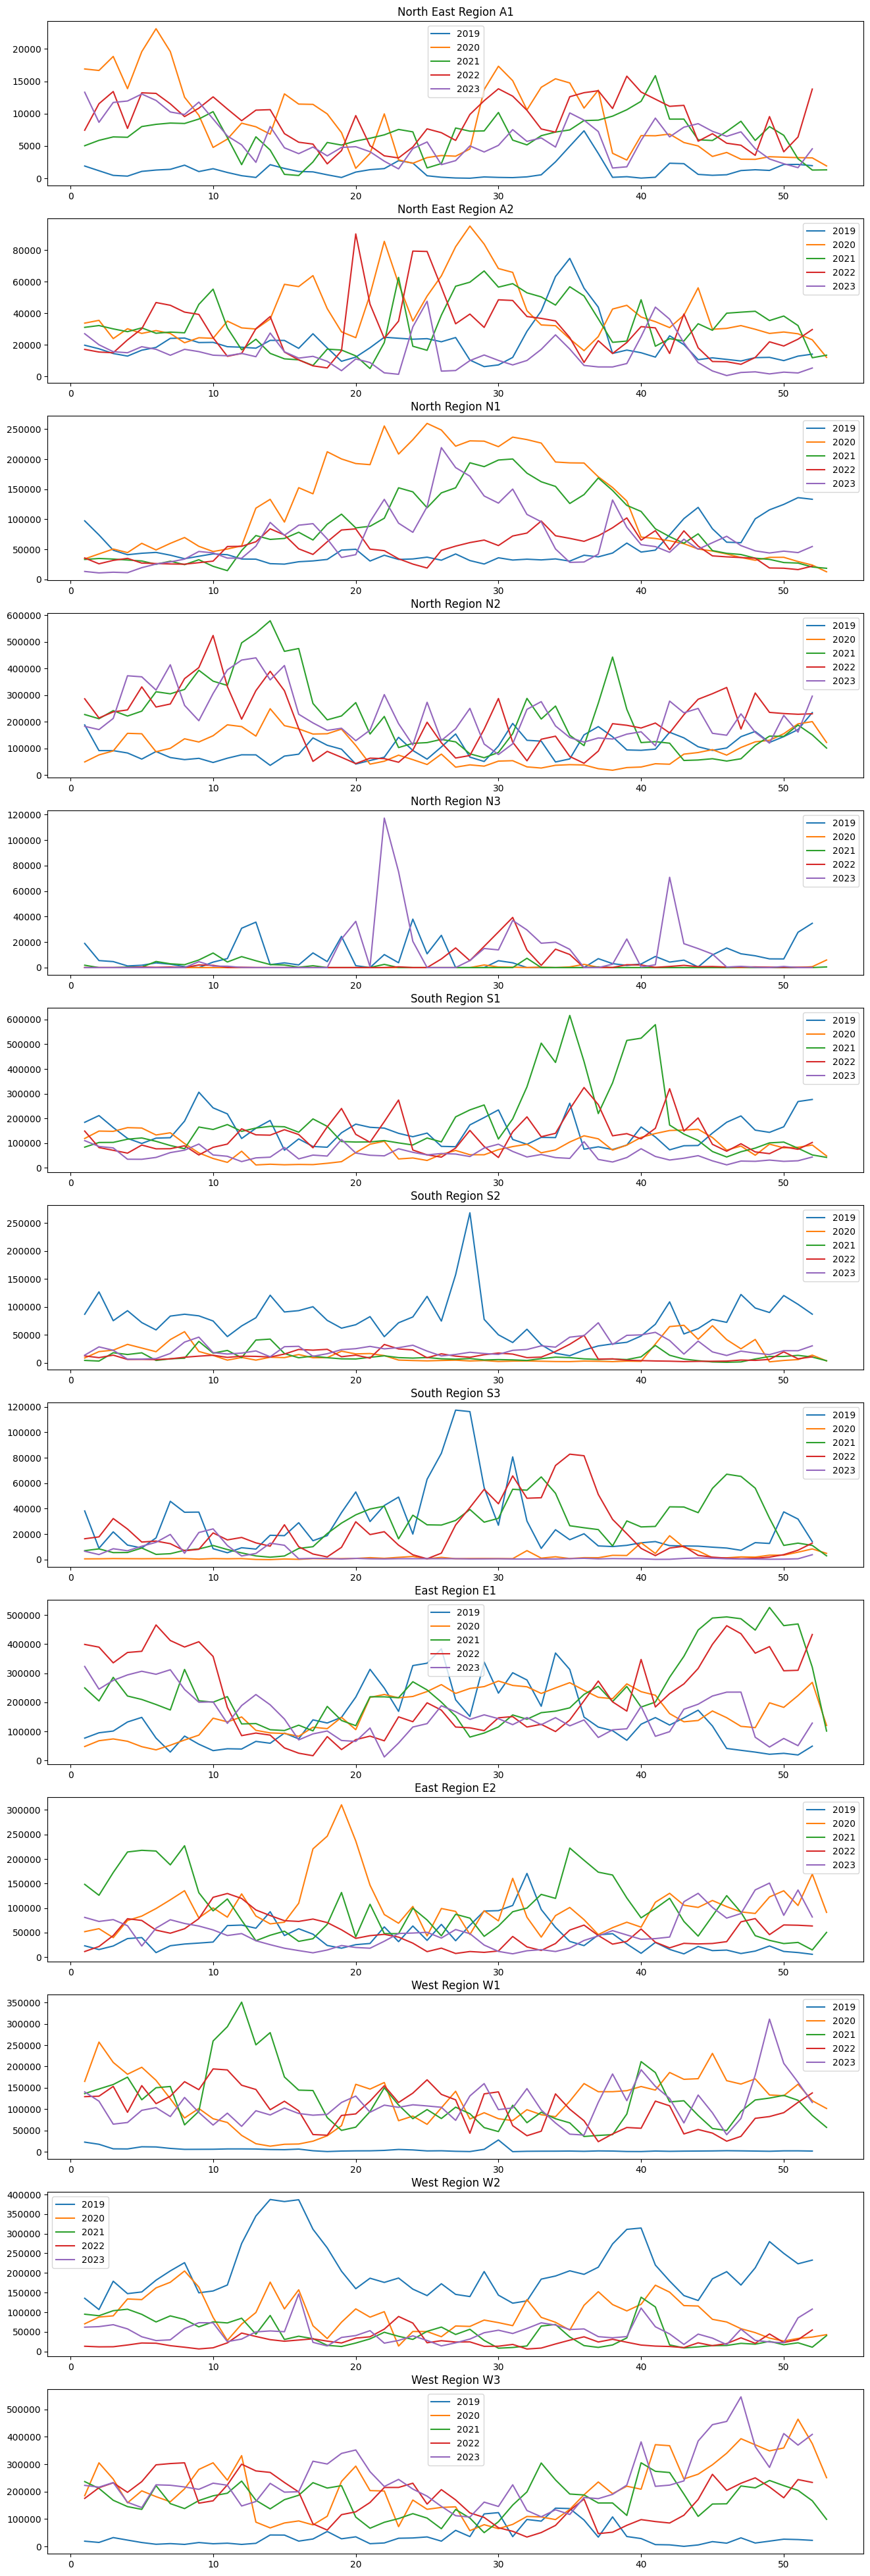

In [15]:
fig, ax = plt.subplots(nrows=len(areas), ncols=1, figsize=(16,50))
for index, (area, region) in enumerate(areas.items()):
    
    ax[index].plot(dataframes[0].loc[:, "Week"], dataframes[0].loc[:,area], label="2019")
    ax[index].plot(dataframes[1].loc[:, "Week"], dataframes[1].loc[:,area], label="2020")
    ax[index].plot(dataframes[2].loc[:, "Week"], dataframes[2].loc[:,area], label="2021")
    ax[index].plot(dataframes[3].loc[:, "Week"], dataframes[3].loc[:,area], label="2022")
    ax[index].plot(dataframes[4].loc[:, "Week"], dataframes[4].loc[:,area], label="2023")
    ax[index].set_title(f"{region} {area}")
    ax[index].legend()
plt.show()

In [16]:
dataframe = pd.concat(dataframes,ignore_index=True)

In [17]:
dataframe

Year  Week       A1        A2         E1         E2        N1         N2  \
0    2019     1  1898.73  19770.94   77188.81   23101.92  97407.21  187756.62   
1    2019     2  1171.74  17515.57   95533.48   15445.06  73991.81   91238.92   
2    2019     3   452.50  14513.08  101453.47   22696.67  48571.78   91115.56   
3    2019     4   337.65  12887.27  132620.96   37805.47  41089.82   82321.45   
4    2019     5  1072.50  16622.40  148448.56   39846.79  43507.05   59359.28   
..    ...   ...      ...       ...        ...        ...       ...        ...   
257  2023    48  4577.18   2914.13   80169.43  137048.60  47513.84  159852.63   
258  2023    49  2989.25   1604.62   46530.80  150944.05  43942.68  119345.26   
259  2023    50  2256.25   2722.51   76019.21   85209.71  47038.81  223724.46   
260  2023    51  1648.15   2197.97   51152.24  136820.58  44602.43  160806.39   
261  2023    52  4564.83   5330.33  128886.90   81818.02  54742.42  295964.79   

           N3         S1         S2        S3         W1         W2  \
0    18954.36  184191.55   86642.43  38205.86   22387.80  135453.08   
1     5500.00  211490.25  126707.47   8943.83   17359.20  106671.73   
2     4700.00  163196.01   75109.42  21796.22    6662.95  178970.41   
3     1300.00  119244.65   93012.04  11401.15    6403.48  147305.53   
4     1825.00   98685.12   71755.65   9159.55   11514.80  151589.60   
..        ...        ...        ...       ...        ...        ...   
257    227.93   26469.49   17068.34    417.60  179920.38   28213.06   
258      0.00   31532.01   14457.45    302.40  311063.74   24054.37   
259    858.83   26355.28   21462.39    374.40  207342.95   22120.09   
260      0.00   28714.46   21360.84    655.20  162964.95   85495.64   
261     37.50   43913.27   30159.89   3849.69  115558.29  107908.69   

            W3  Cleared Volume         MCV  
0     19285.00       912243.01   912683.42  
1     14701.21       786269.06   788258.95  
2     32410.00       761647.14   762310.36  
3     23237.50       708965.92   709558.63  
4     14375.00       667760.29   675397.20  
..         ...             ...         ...  
257  364281.09      1048672.37  1048672.37  
258  288337.85      1035103.09  1035103.09  
259  411735.96      1127219.34  1127219.34  
260  369652.70      1066070.02  1066070.02  
261  408774.56      1281507.36  1281507.36  

[262 rows x 17 columns]

In [18]:
dataframe.to_csv('latest_weekly_data_2019_23.csv')

In [10]:
data = []
temp_dp = []
c1 = 0
c2 = 0
bulk = 1
for i in range(1, dataframe.shape[0]+1):

    temp_dp.append(dataframe.iloc[i-1].values[2:])
    
    c1+=1
    temp = [bulk]
    if c2 == 2 and c1 == 5:
        dp = [sum(x) for x in zip(*temp_dp)]
        temp.extend(dp)
        temp_dp.clear()
        data.append(temp)
        bulk+=1
        c1 = 0
        c2 = 0
        
    elif c2 != 2 and c1 == 4:
        dp = [sum(x) for x in zip(*temp_dp)]
        temp_dp.clear()
        temp.extend(dp)
        data.append(temp)
        bulk+=1
        c1 = 0
        c2+=1

In [11]:

new_col = ['Month']
new_col.extend(dataframe.columns[2:])
new_df = pd.DataFrame(data, columns=new_col)
new_df.head()

Month       A1        A2         E1         E2         N1         N2  \
0      1  3860.62  64686.86  406796.72   99049.12  261060.62  452432.55   
1      2  5772.58  83401.07  338964.03   98982.08  163178.36  269673.07   
2      3  3969.75  98276.32  236743.00  248010.63  189720.95  322301.82   
3      4  5691.70  90473.49  368438.59  241241.91  111828.90  323245.35   
4      5  2973.25  58101.68  809480.95   95224.70  162733.65  302696.07   

         N3          S1         S2         S3        W1          W2  \
0  30454.36   678122.46  381471.36   80347.06  52813.43   568400.75   
1   8875.00   530062.42  300461.25  109170.23  35712.90   764632.28   
2  77850.00  1045881.81  351272.18   68861.00  30406.75  1092977.27   
3  19600.00   466898.85  404805.91   81742.11  17942.35  1466977.28   
4  30650.00   566448.60  287807.87  138743.78   5699.70   814803.25   

          W3  Cleared Volume         MCV  
0   89633.71      3169125.13  3172811.36  
1   40385.00      2749266.15  2799156.29  
2   55227.50      3821493.68  3955492.08  
3  130223.66      3729106.30  3793853.73  
4  127945.61      3403303.53  3406845.23

In [12]:
new_df.columns

Index(['Month', 'A1', 'A2', 'E1', 'E2', 'N1', 'N2', 'N3', 'S1', 'S2', 'S3',
       'W1', 'W2', 'W3', 'Cleared Volume', 'MCV'],
      dtype='object')

In [13]:
df_20_21 = new_df.iloc[:24]
df_22_23 = new_df.iloc[24:]


avg = df_20_21[df_20_21.columns[1:-2]].mean(skipna=True)
avg = avg.astype(int)
avg.sort_values()

# new_df.iloc[:24]

N3     17812
A1     22020
S3     66210
A2    133365
S2    204748
W1    266385
E2    313828
N1    385179
N2    431825
S1    503935
W3    533835
W2    648832
E1    676121
dtype: int32

<Axes: >

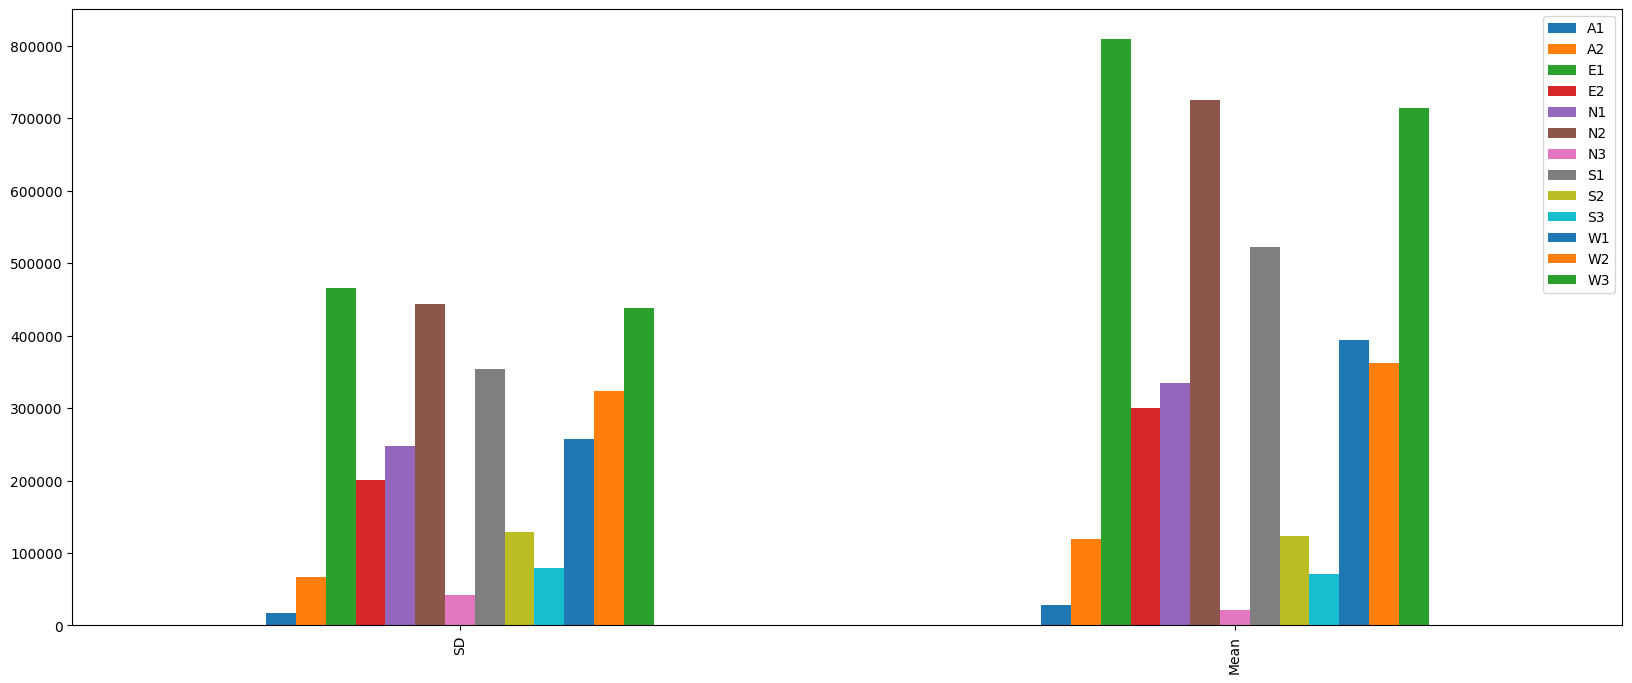

In [14]:
pd.concat([new_df.iloc[:, 1:-2].std().rename("SD"), new_df.iloc[:, 1:-2].mean().rename("Mean")],axis=1).T.plot.bar(figsize=(20, 8))

<Axes: >

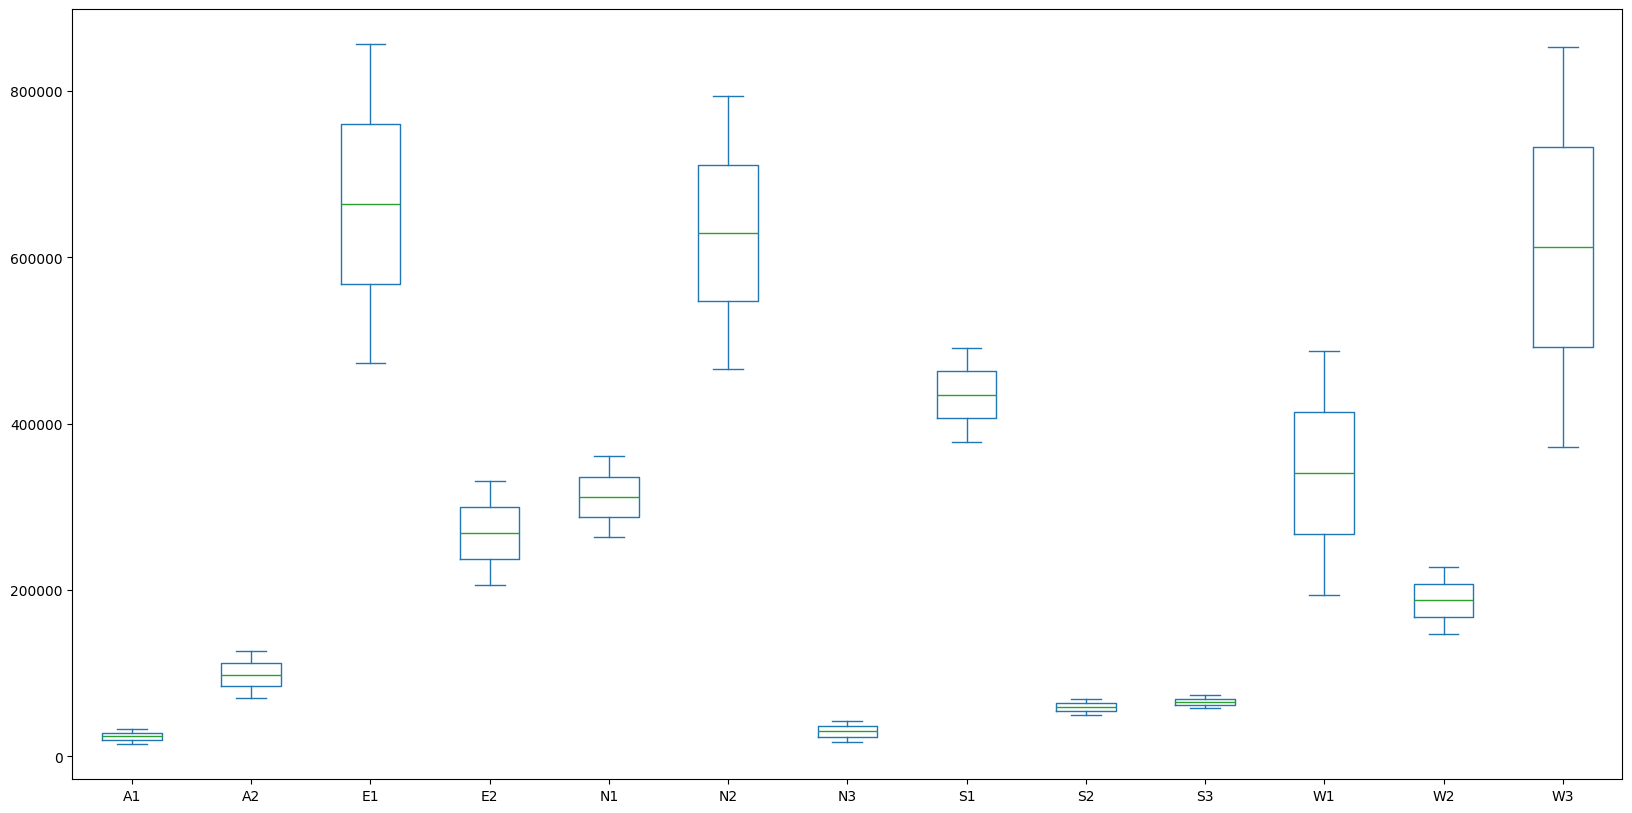

In [16]:
pd.concat([new_df.iloc[:, 1:-2].std().rename("SD"), new_df.iloc[:, 1:-2].mean().rename("Mean")],axis=1).T.plot.box(figsize=(20, 10))

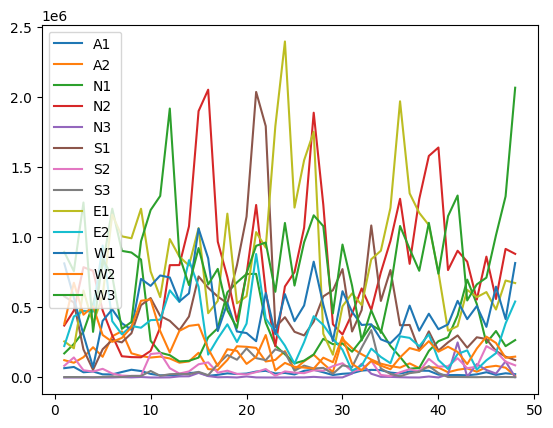

In [17]:
for index, (area, region) in enumerate(areas.items()):
    s = new_df[area]
    plt.plot(new_df.loc[:, "Month"], s, label=area)
    plt.legend()

In [18]:
e1_ts = new_df["E1"] # Highest demand and Highest varience
# Areas near E1 -> A2, N2, W3, E2 (To see if there is an offset -> When demand increase or decrease in e1...depend on another region demand)
a2_ts = new_df["A2"]
n2_ts = new_df["N2"]
w3_ts = new_df["W3"]
e2_ts = new_df["E2"]

 


w3_ts = new_df["W3"]

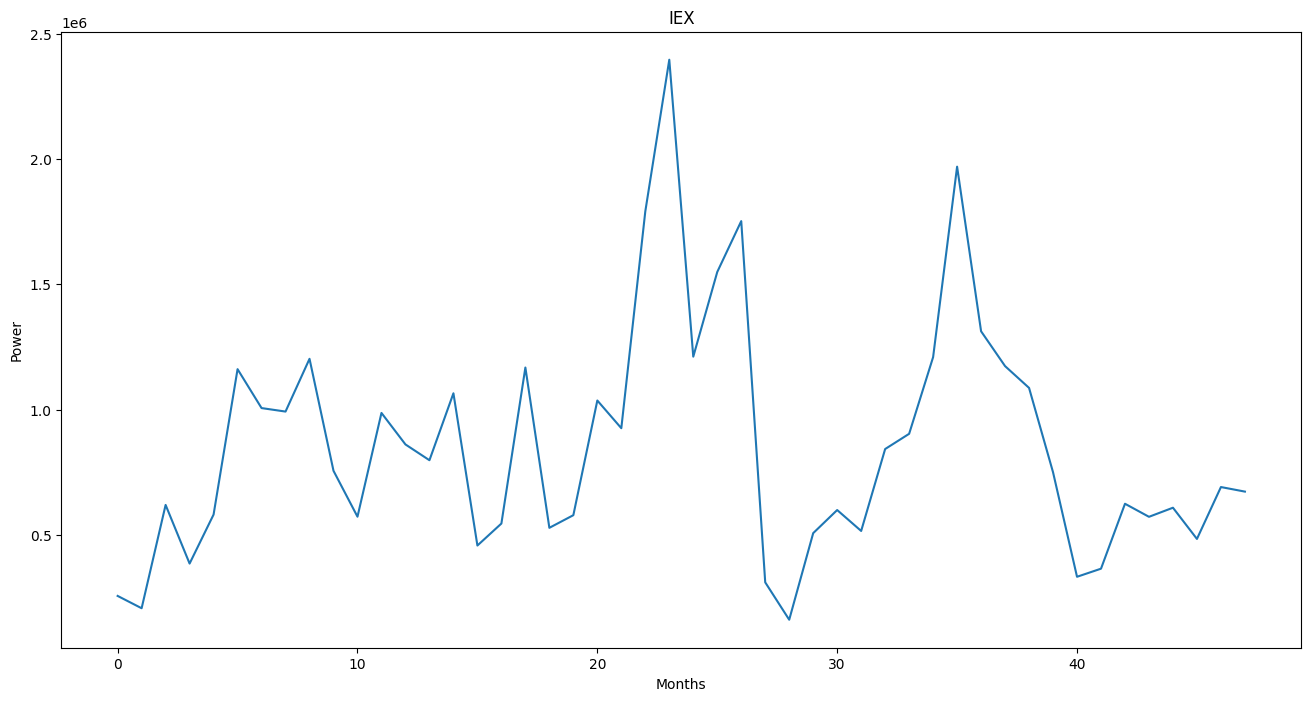

In [19]:
e1_ts.astype('float')
plt.figure(figsize=(16, 8))
plt.title('IEX')
plt.xlabel('Months')
plt.ylabel('Power')
plt.plot(e1_ts)

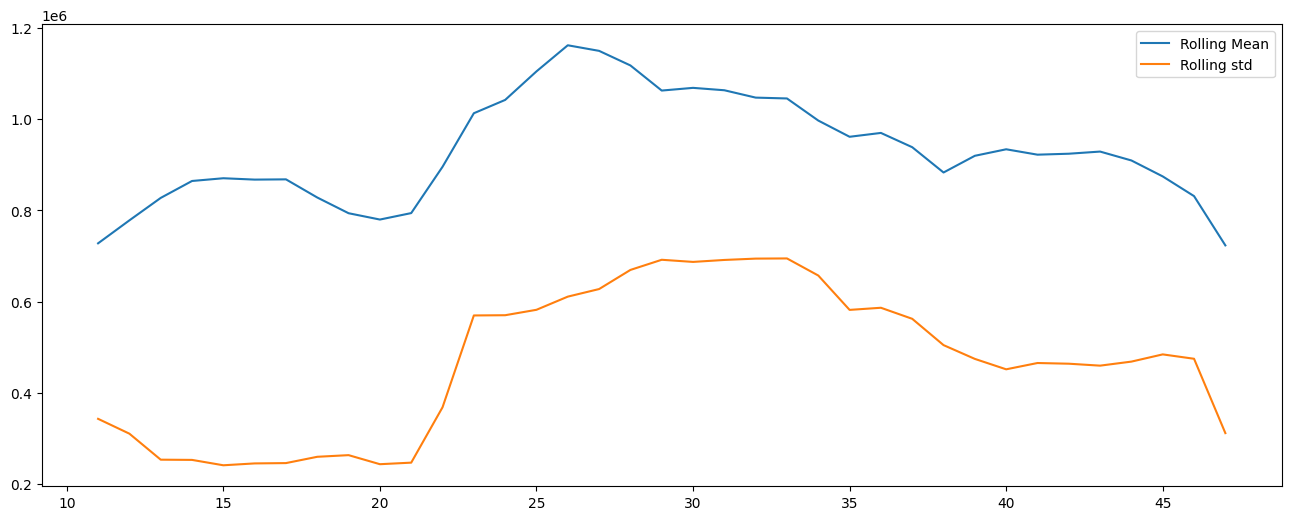

In [20]:
plt.figure(figsize=(16, 6))
plt.plot(e1_ts.rolling(window=12, center=False).mean(), label='Rolling Mean')
plt.plot(e1_ts.rolling(
    window=12, center=False).std(), label='Rolling std')
plt.legend()

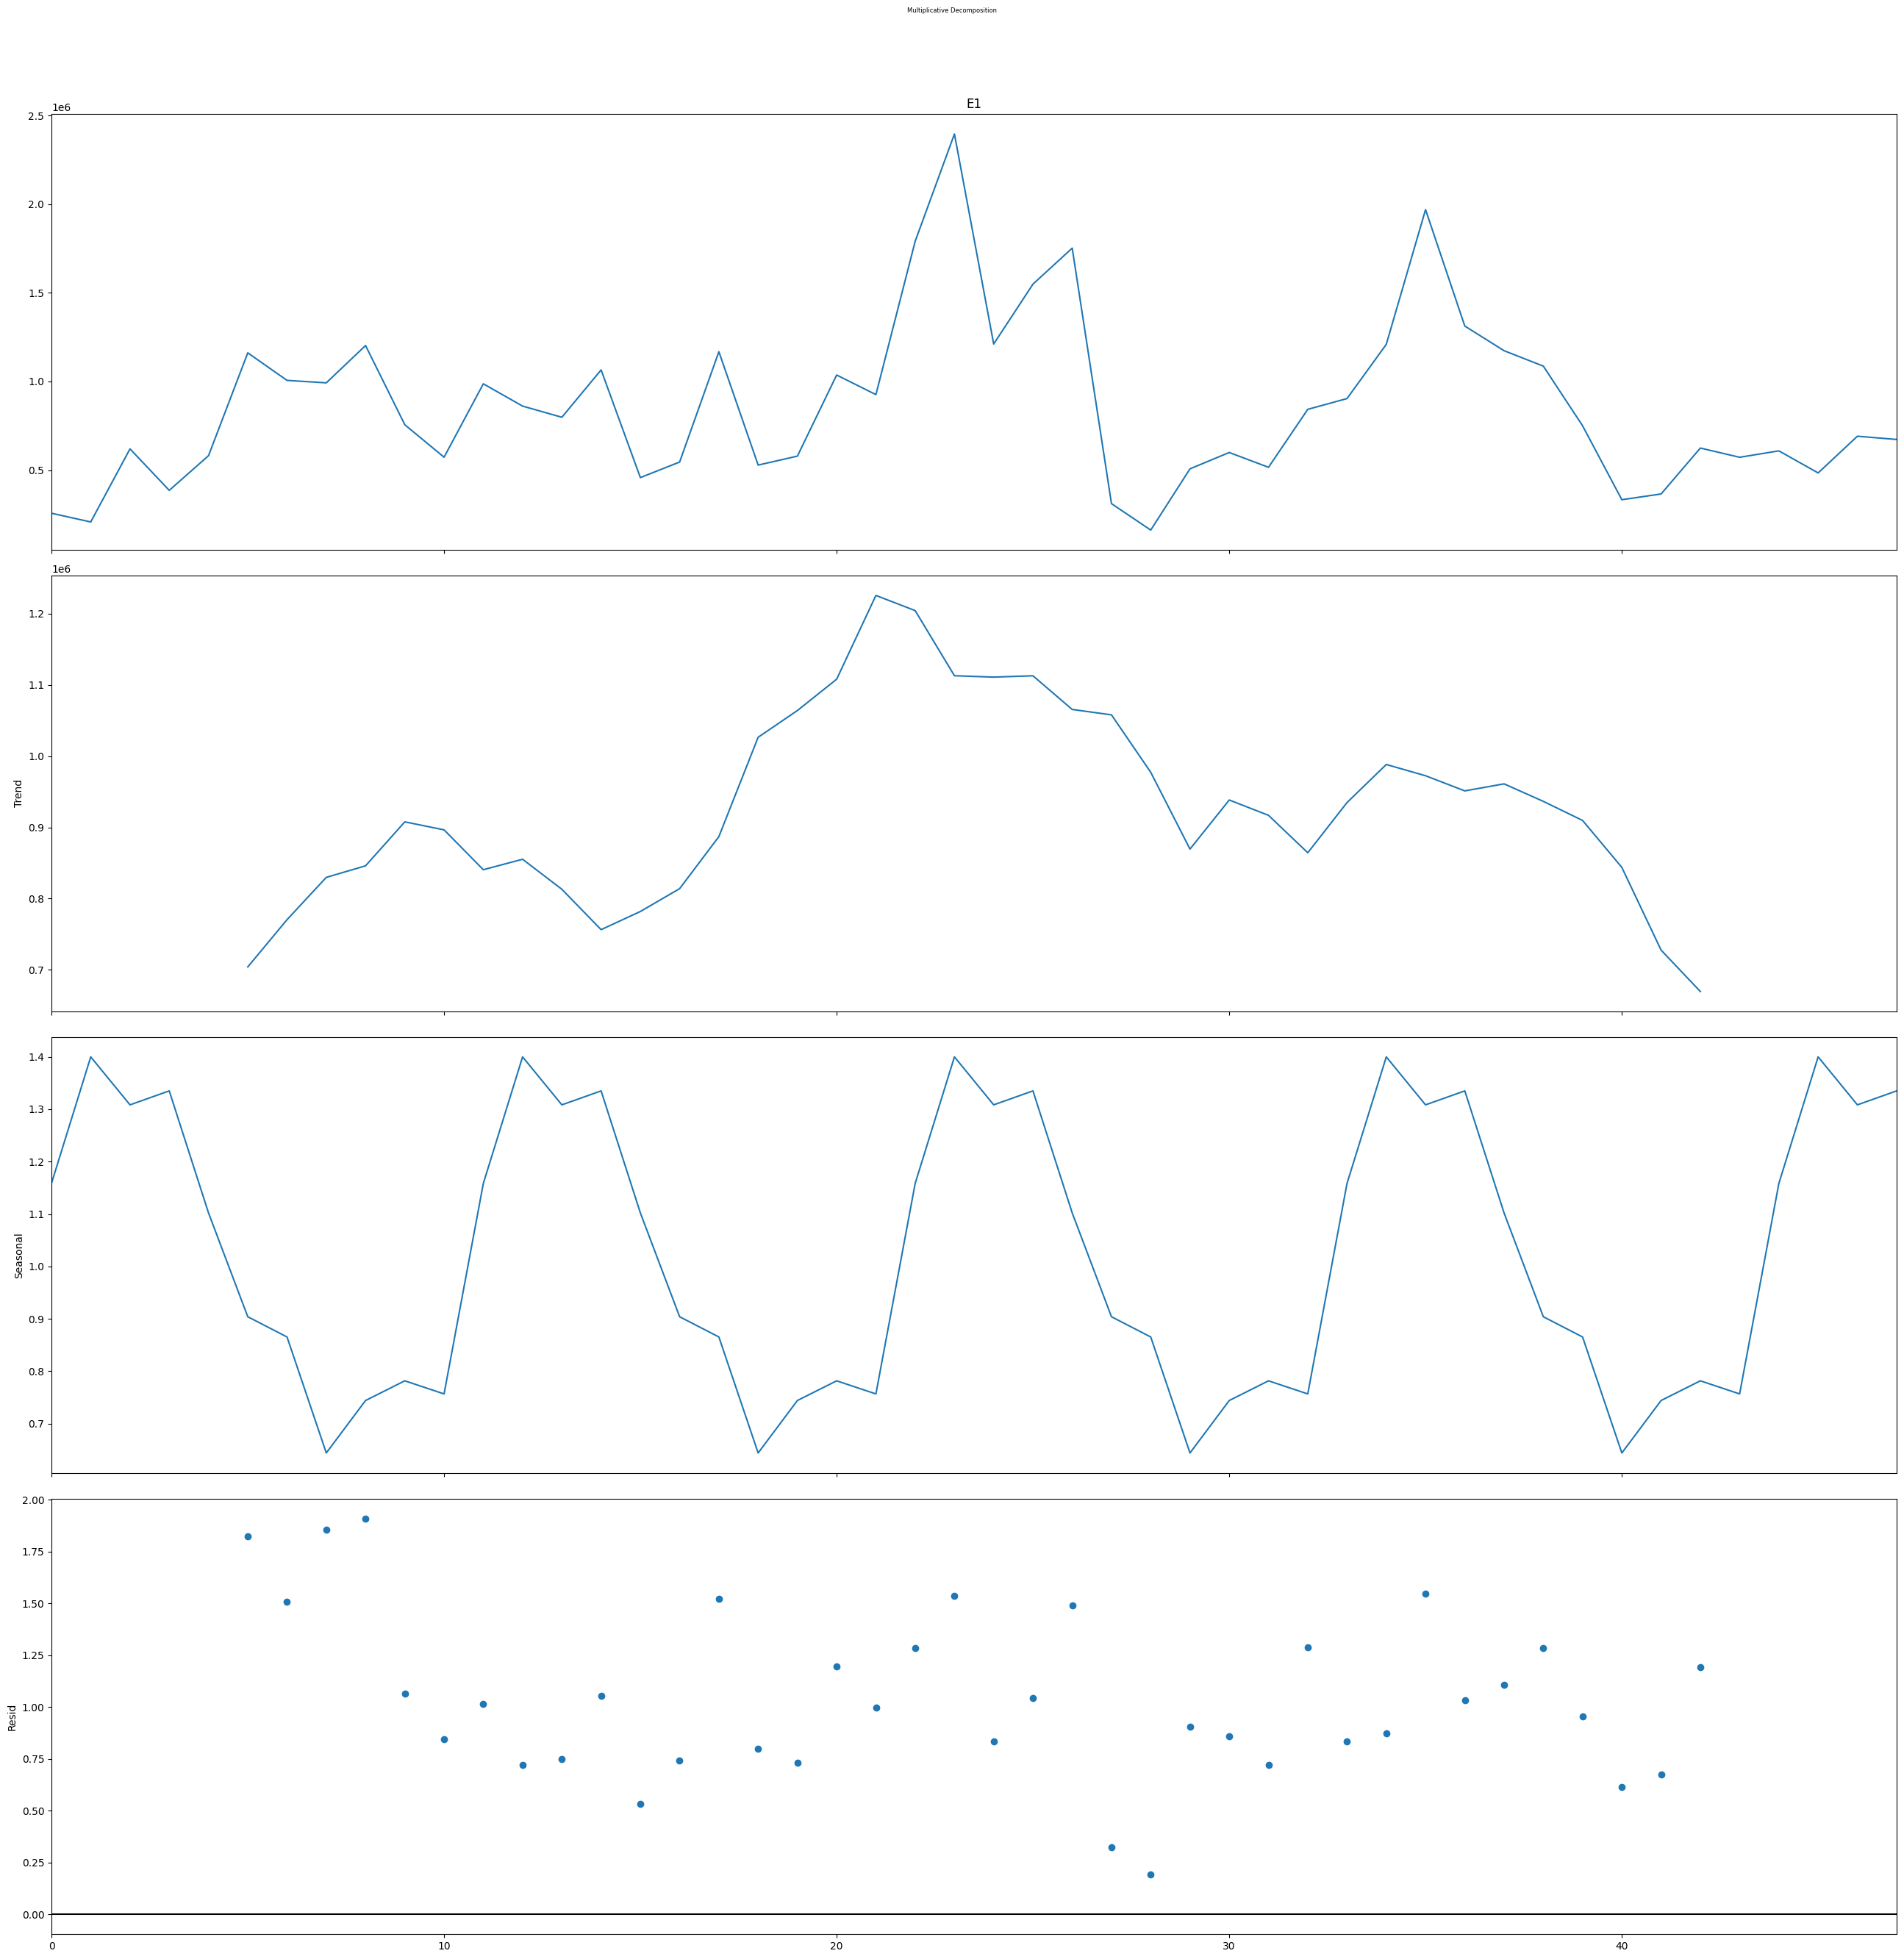

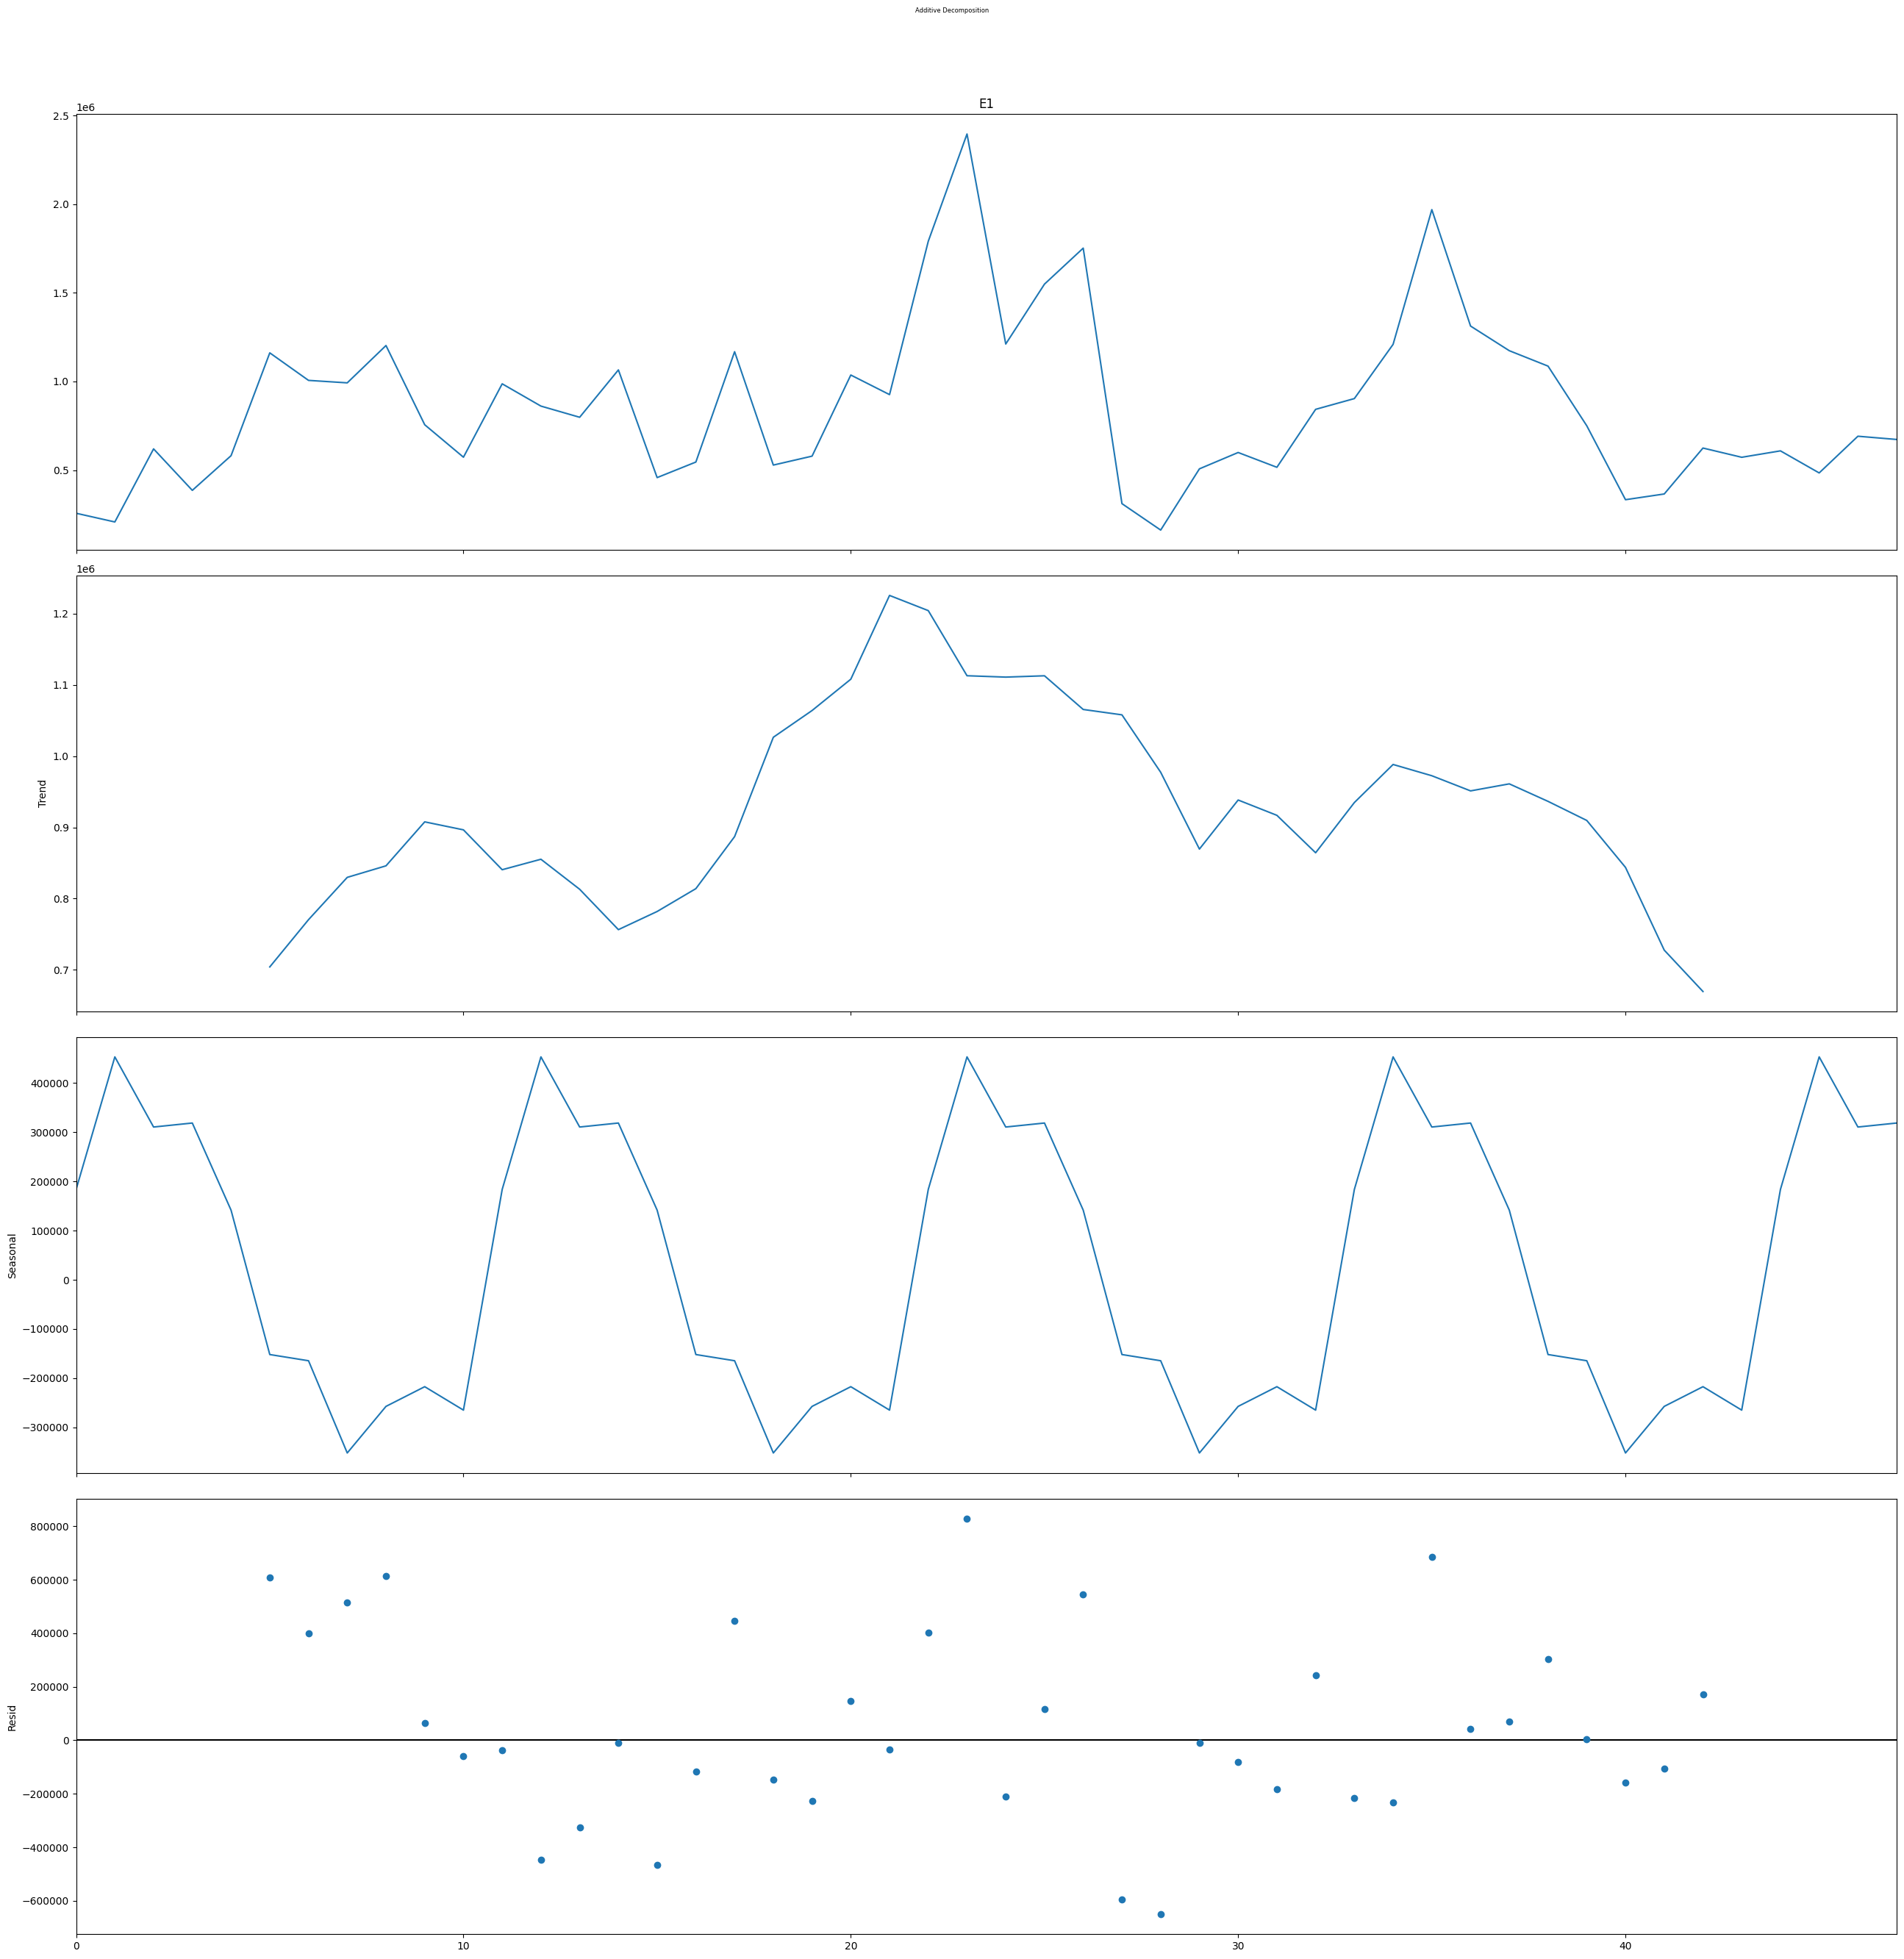

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(e1_ts, model='multiplicative', period=11)

# Additive Decomposition
additive_decomposition = seasonal_decompose(e1_ts, model='additive', period=11)

# Plot
plt.rcParams.update({'figure.figsize': (26,28)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=6)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=6)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [22]:
e1_ts_1 = df_20_21["E1"]
e1_ts_2 = df_22_23["E1"]

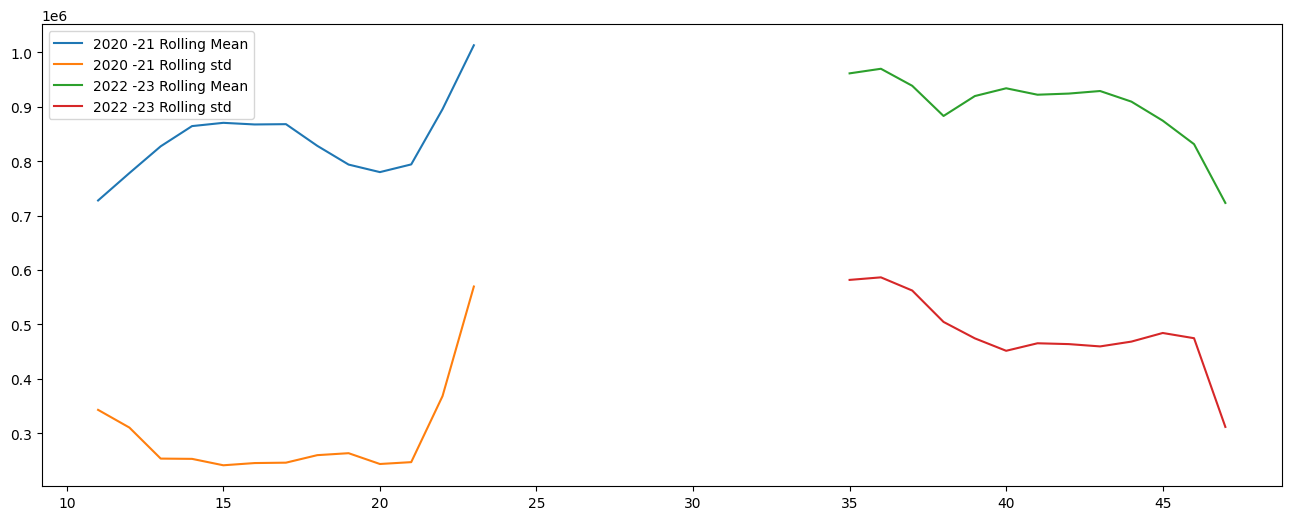

In [23]:
plt.figure(figsize=(16, 6))
plt.plot(e1_ts_1.rolling(window=12, center=False).mean(), label='2020 -21 Rolling Mean')
plt.plot(e1_ts_1.rolling(
    window=12, center=False).std(), label='2020 -21 Rolling std')
plt.plot(e1_ts_2.rolling(window=12, center=False).mean(), label='2022 -23 Rolling Mean')

plt.plot(e1_ts_2.rolling(
    window=12, center=False).std(), label='2022 -23 Rolling std')
plt.legend()

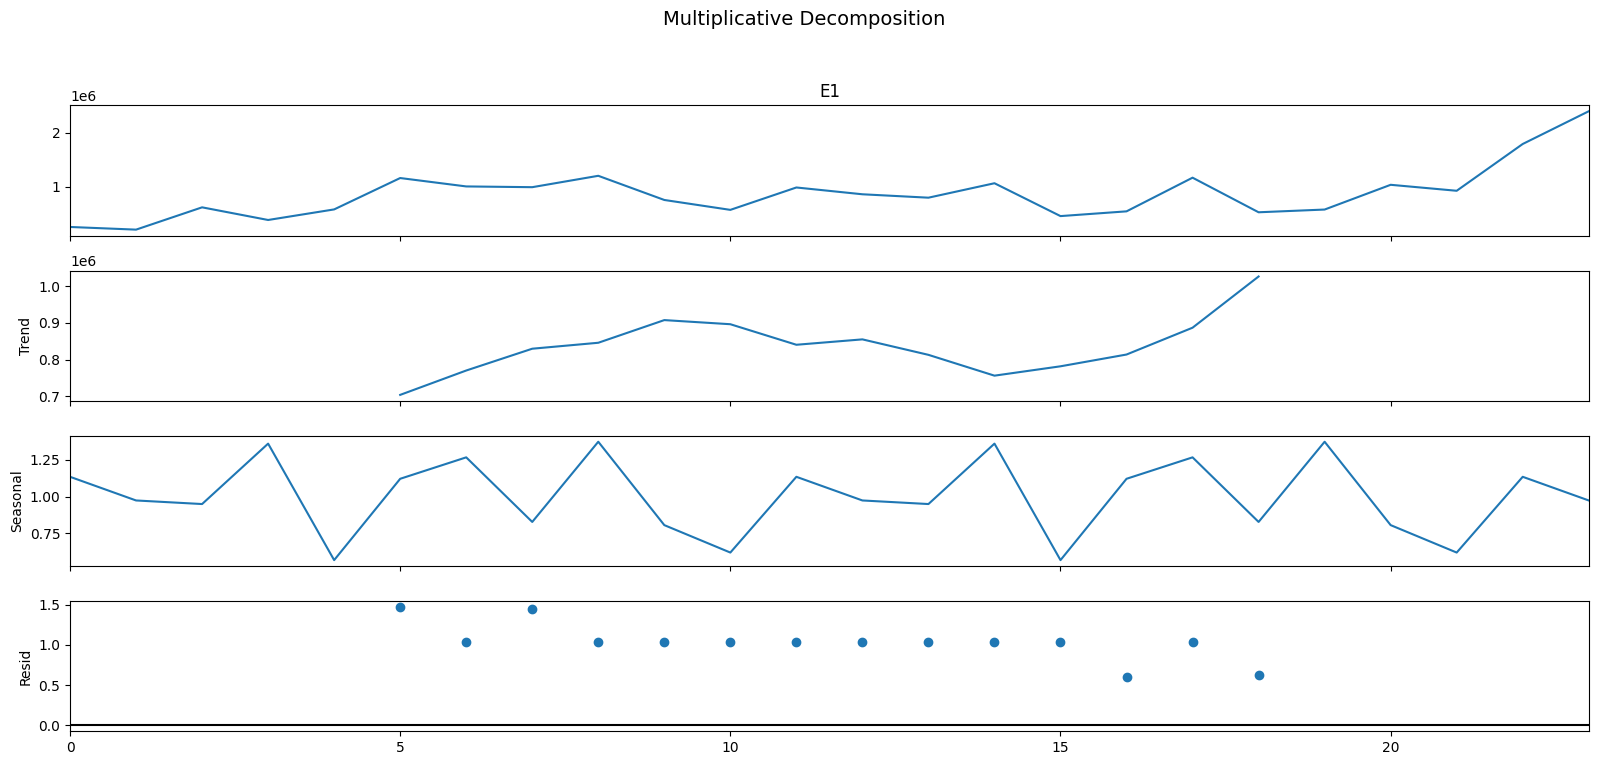

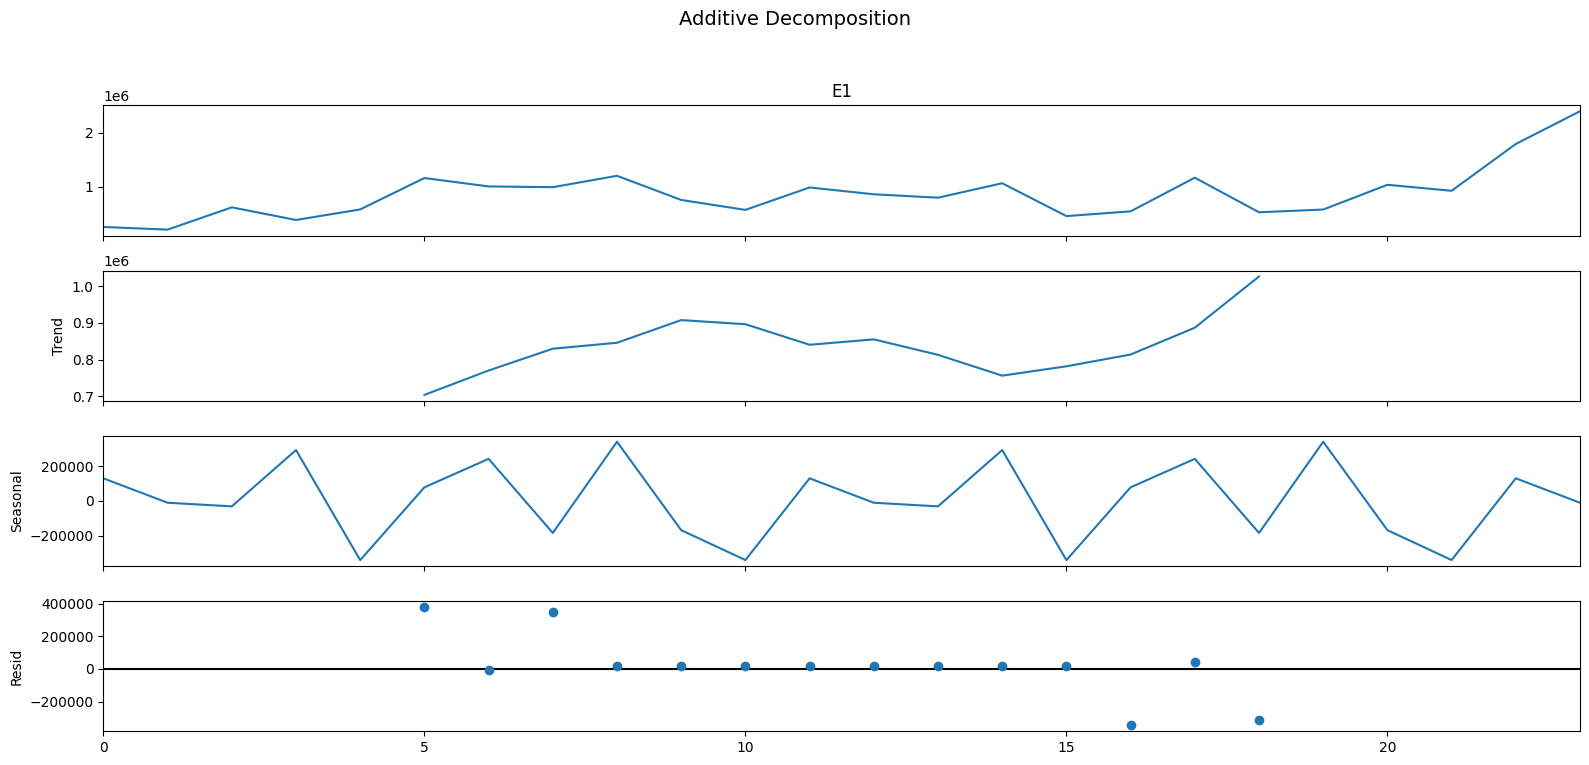

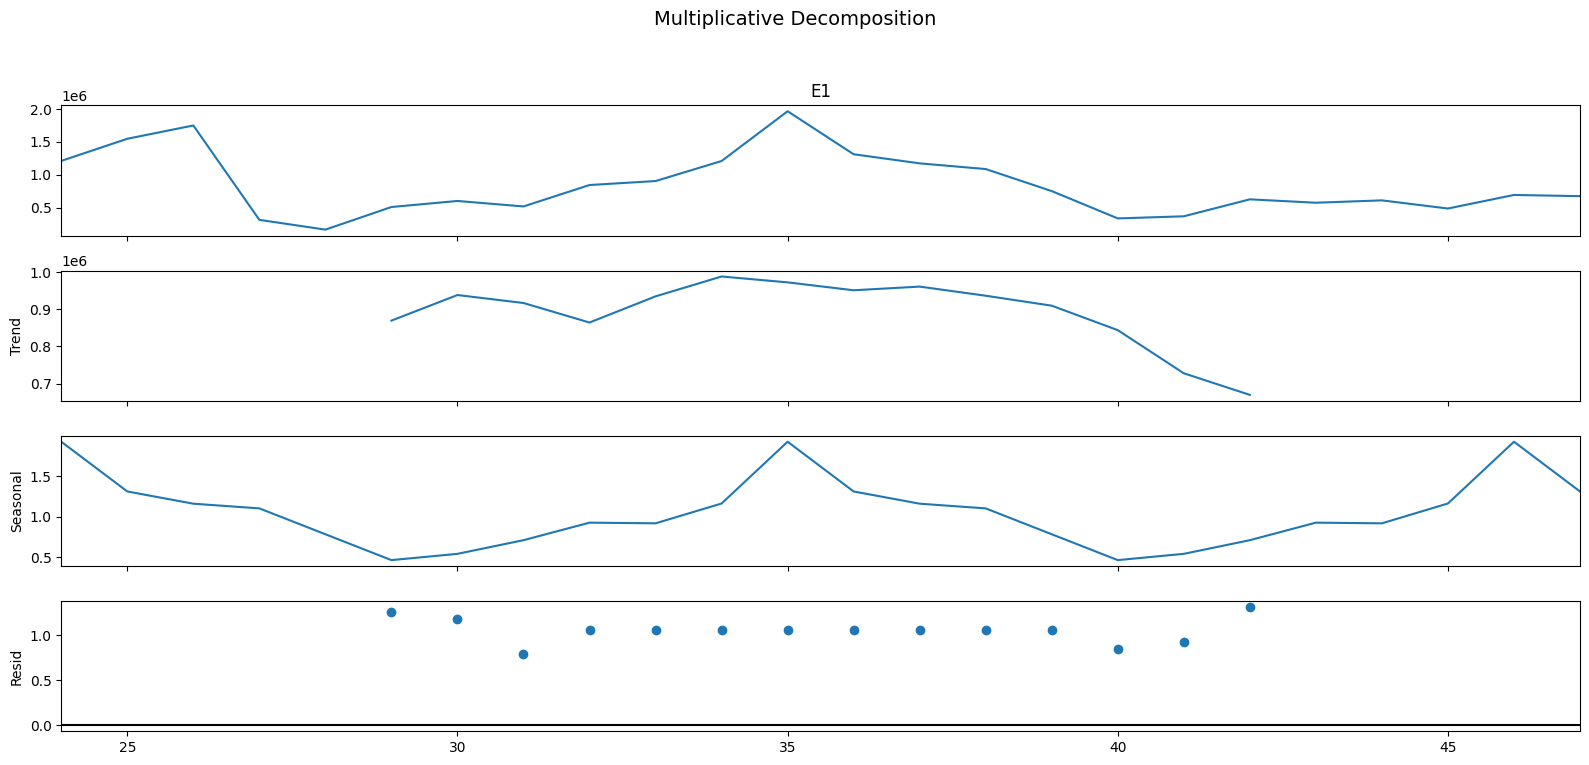

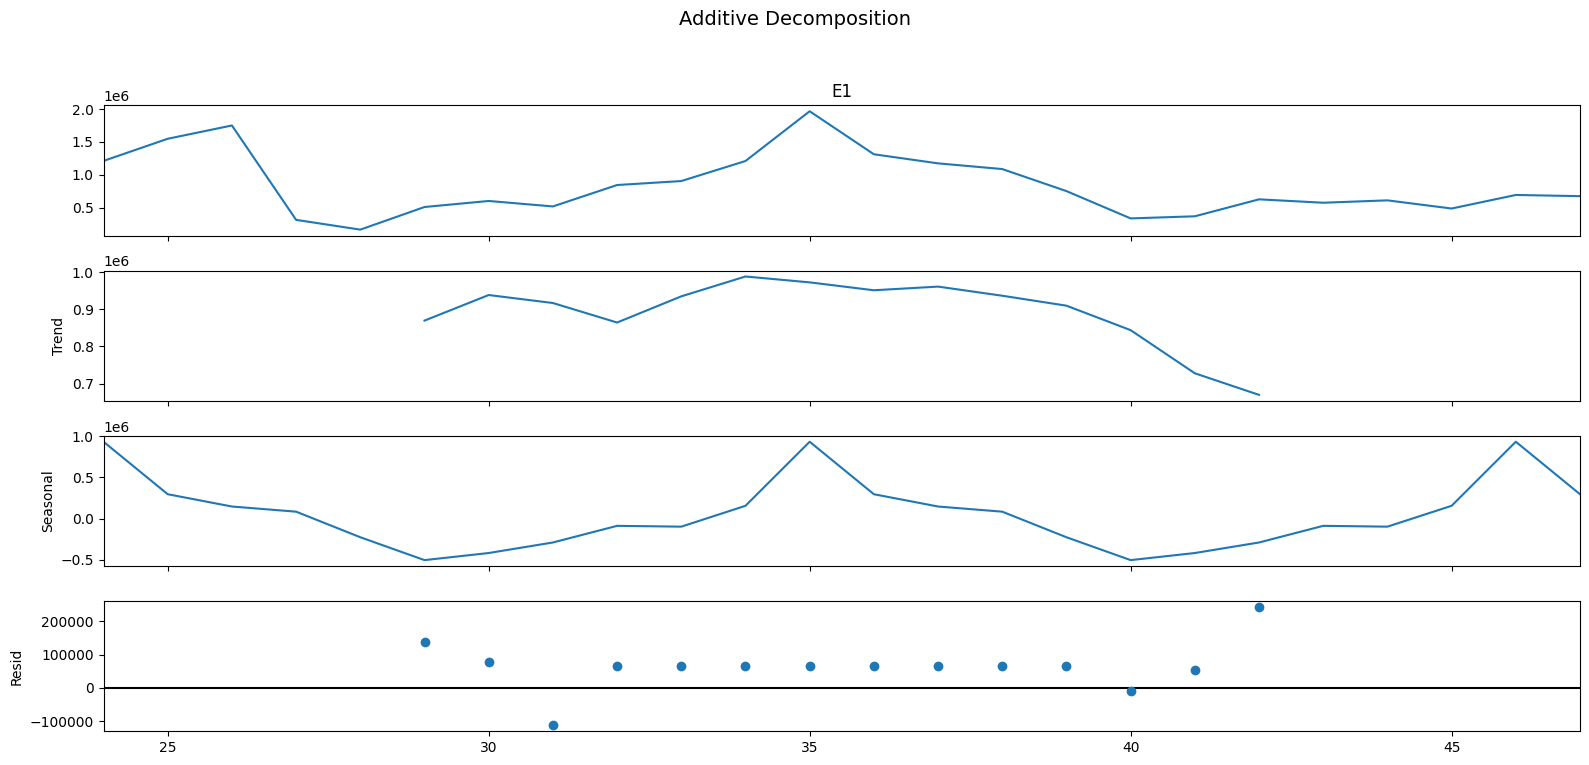

In [24]:
# Multiplicative Decomposition 2020 -21 
multiplicative_decomposition_1 = seasonal_decompose(e1_ts_1, model='multiplicative', period=11)

# Additive Decomposition 2020 -21
additive_decomposition_1 = seasonal_decompose(e1_ts_1, model='additive', period=11)

# Multiplicative Decomposition 2022 -23
multiplicative_decomposition_2 = seasonal_decompose(e1_ts_2, model='multiplicative', period=11)

# Additive Decomposition2022 -23
additive_decomposition_2 = seasonal_decompose(e1_ts_2, model='additive', period=11)

# Plot
plt.rcParams.update({'figure.figsize': (16,8)})
multiplicative_decomposition_1.plot().suptitle('Multiplicative Decomposition', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition_1.plot().suptitle('Additive Decomposition', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

multiplicative_decomposition_2.plot().suptitle('Multiplicative Decomposition', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition_2.plot().suptitle('Additive Decomposition', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [25]:
def gradient(x1,y1, x2, y2):
    return (y2-y1)/(x2-x1)


def compare(a,b,c,d):
    l = sorted([a,b,c,d])
    if l[0][0]<0 and l[1][0]>0:
        return l[0][1]
    elif l[2][0]<0 and l[3][0]>0:
        return l[3][1]

In [26]:
plt.figure(figsize=(10,3))
plt.rcParams.update({'font.size': 10})
gradient_l = [(0.0,(0))]
for i in range(1,48):
    # print(new_df.loc[i-1, "Month"])
    x1,y1 = new_df.loc[i-1, "Month"],new_df.loc[i-1, "E1"]
    x2,y2 = new_df.loc[i, "Month"],new_df.loc[i, "E1"]
    # print(f'gradient of {i-1}, {i} -> {gradient(x1,y1,x2,y2)}')
    gradient_l.append((gradient(x1,y1,x2,y2),y2))

# for i in range(1, 48, 12):
#     plt.plot(new_df.loc[:11, "Month"], new_df.loc[i-1:i+10, "E1"], label=f"{i} - {i+11}", marker = '*')
#     plt.legend()
markers = []
markers_index = []
for i in range(1,12):
    if (x:= compare(gradient_l[i],gradient_l[i+12],gradient_l[i+24],gradient_l[i+36])) is not None:
        markers_index.append(i+1)
        markers.append(x)

<Figure size 1000x300 with 0 Axes>

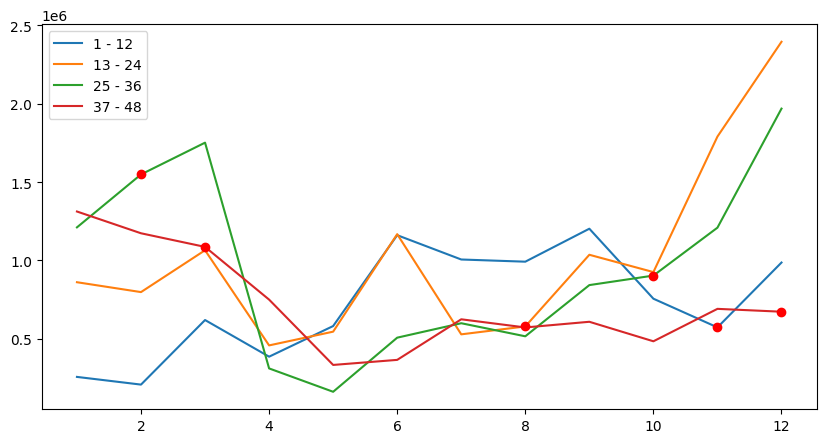

In [27]:
plt.figure(figsize=(10,5))
for i in range(1, 48, 12):
    plt.plot(new_df.loc[:11, "Month"],
             new_df.loc[i-1:i+10, "E1"], label=f"{i} - {i+11}")
    plt.legend()
plt.plot(markers_index, markers, "o", color="red")

In [28]:
from neuralprophet import NeuralProphet 

c:\Miniconda3\envs\intern\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [29]:
data = 

SyntaxError: invalid syntax (560489426.py, line 1)

In [ ]:
m = NeuralProphet()

In [71]:
new_df.shape[0]

48

In [100]:
new_df.loc[0:11, "Month"]

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: Month, dtype: int64

0
12
24
36


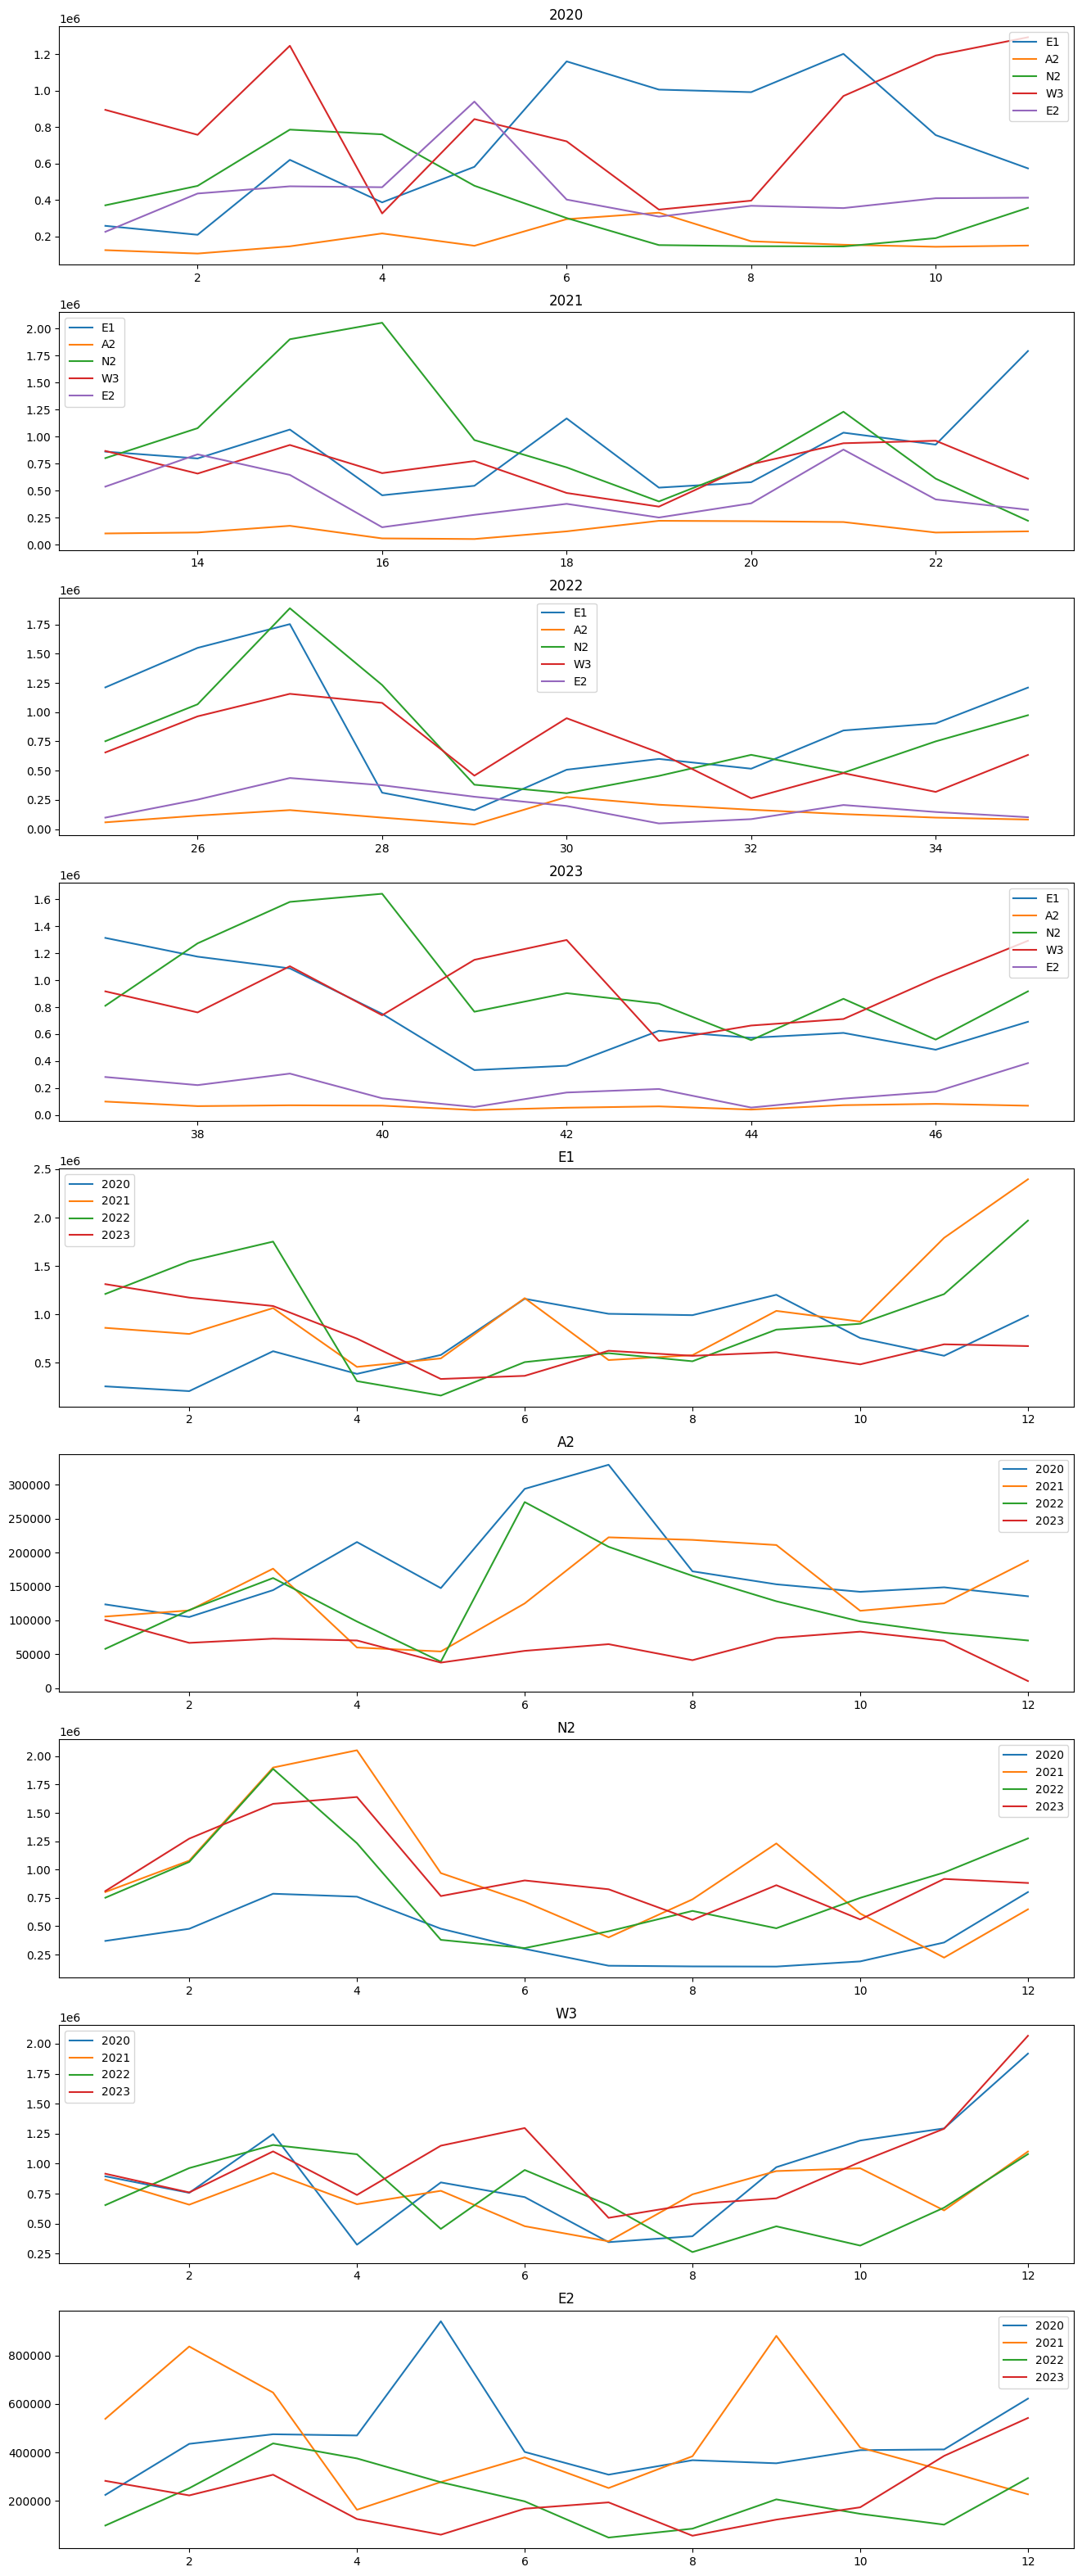

In [30]:
fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(16,40))
year = ["2020", "2021", "2022", "2023"]
count = 0
for i in range(0, new_df.shape[0], 12):
    ax[count].plot(new_df.loc[i:i+10, "Month"], new_df.loc[i:i+10, "E1"], label="E1")
    ax[count].plot(new_df.loc[i:i+10, "Month"], new_df.loc[i:i+10, "A2"], label="A2")
    ax[count].plot(new_df.loc[i:i+10, "Month"], new_df.loc[i:i+10, "N2"], label="N2")
    ax[count].plot(new_df.loc[i:i+10, "Month"], new_df.loc[i:i+10, "W3"], label="W3")
    ax[count].plot(new_df.loc[i:i+10, "Month"], new_df.loc[i:i+10, "E2"], label="E2")
    ax[count].legend()
    ax[count].set_title(f"{year[count]}")
    count+=1
    print(i)
for area in ["E1", "A2", "N2", "W3", "E2"]:
    ax[count].plot(list(range(1,13)), new_df.loc[0:11, area], label="2020")
    ax[count].plot(list(range(1,13)), new_df.loc[12:23, area], label="2021")
    ax[count].plot(list(range(1,13)), new_df.loc[24:35, area], label="2022")
    ax[count].plot(list(range(1,13)), new_df.loc[36:, area], label="2023")
    ax[count].legend()
    ax[count].set_title(f"{area}")
    count+=1
plt.show()

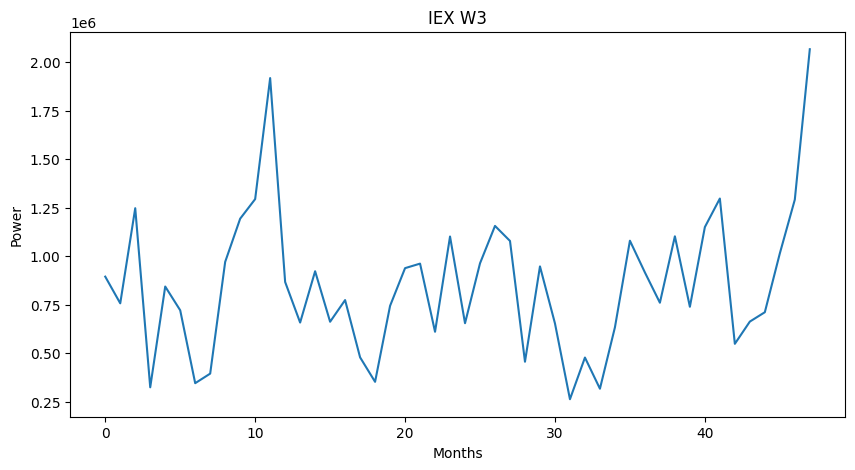

In [85]:
w3_ts.astype('float')
plt.figure(figsize=(10, 5))
plt.title('IEX W3')
plt.xlabel('Months')
plt.ylabel('Power')
plt.plot(w3_ts)

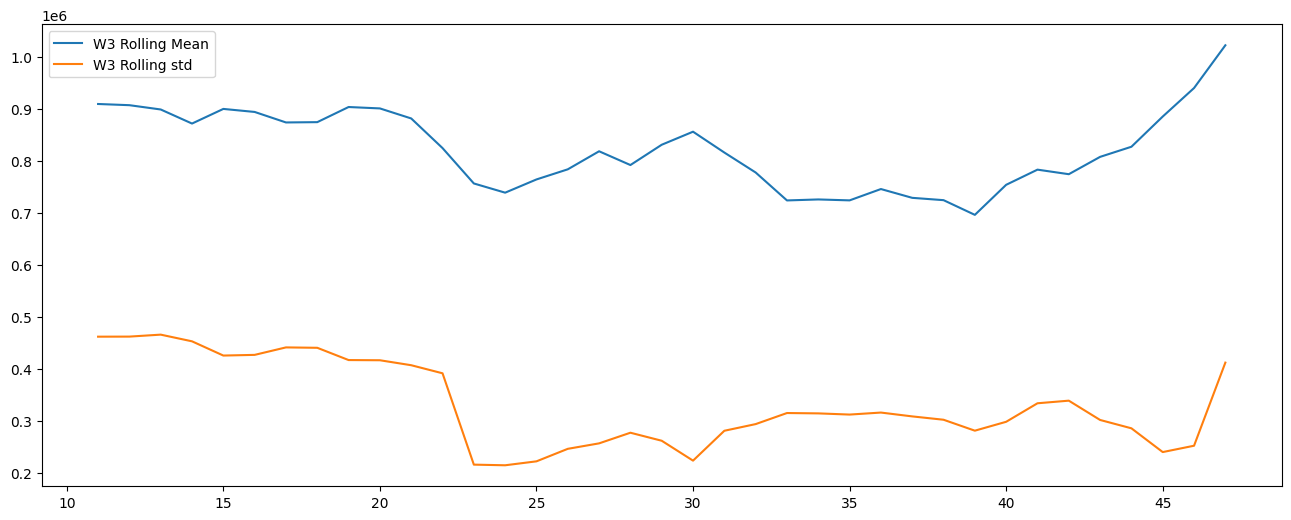

In [81]:
plt.figure(figsize=(16, 6))
plt.plot(w3_ts.rolling(window=12, center=False).mean(), label='W3 Rolling Mean')
plt.plot(w3_ts.rolling(
    window=12, center=False).std(), label='W3 Rolling std')
plt.legend()

In [ ]:
# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(
    w3_ts, model='multiplicative', period=11)

# Additive Decomposition
additive_decomposition = seasonal_decompose(w3_ts, model='additive', period=11)

# Plot
plt.rcParams.update({'figure.figsize': (26, 8)})
multiplicative_decomposition.plot().suptitle(
    'Multiplicative Decomposition', fontsize=6)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=6)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

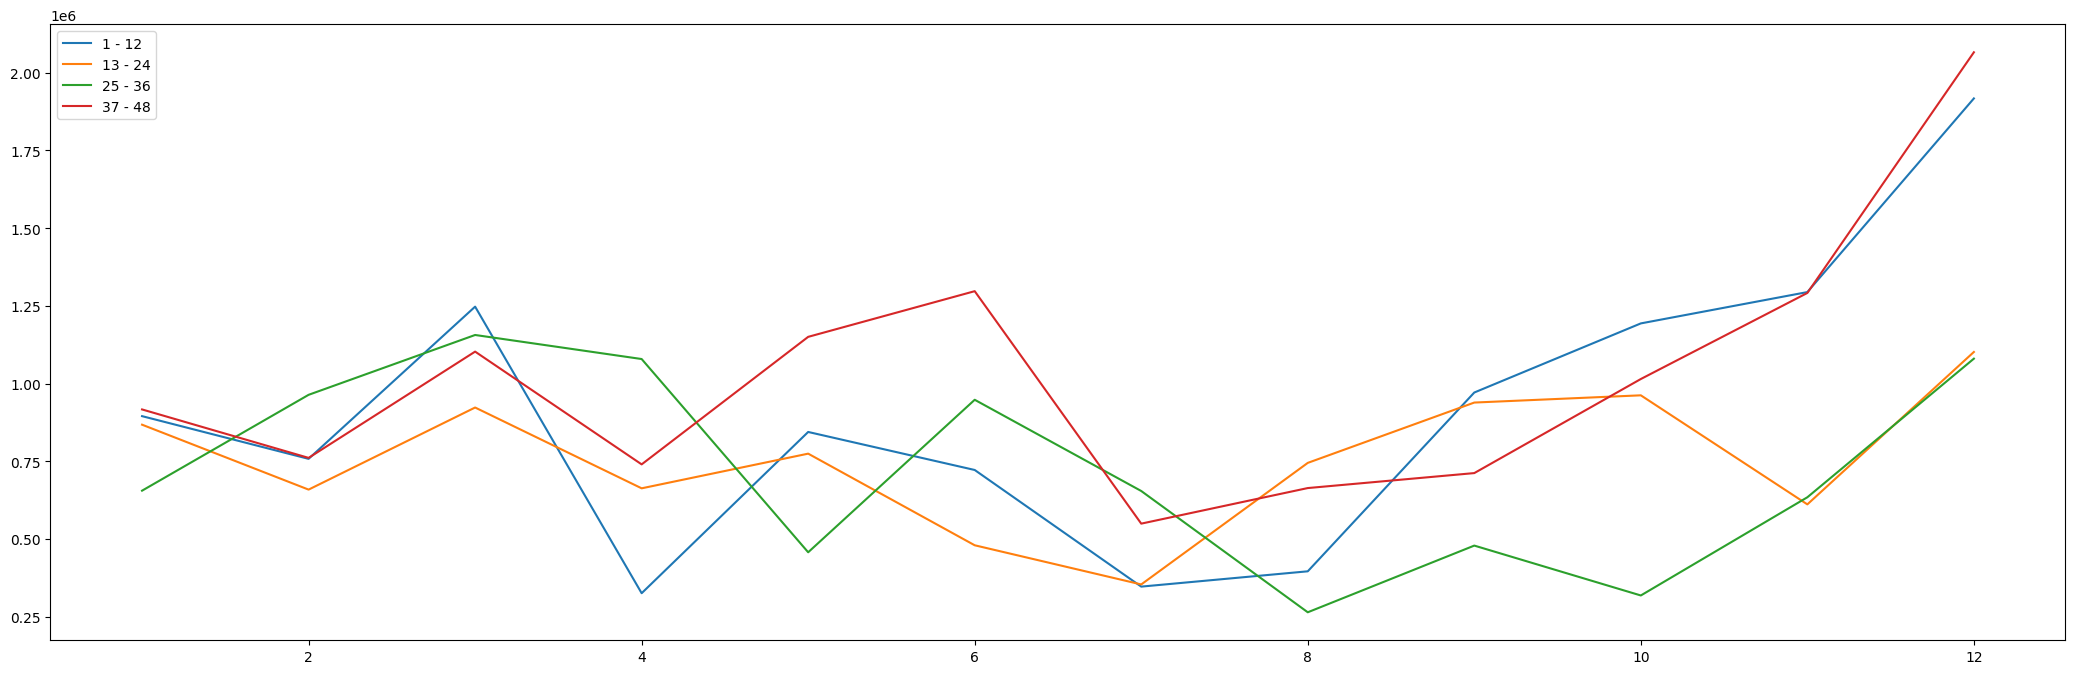

In [84]:
for i in range(1, 48, 12):
    plt.plot(new_df.loc[:11, "Month"],
             new_df.loc[i-1:i+10, "W3"], label=f"{i} - {i+11}")
    plt.legend()

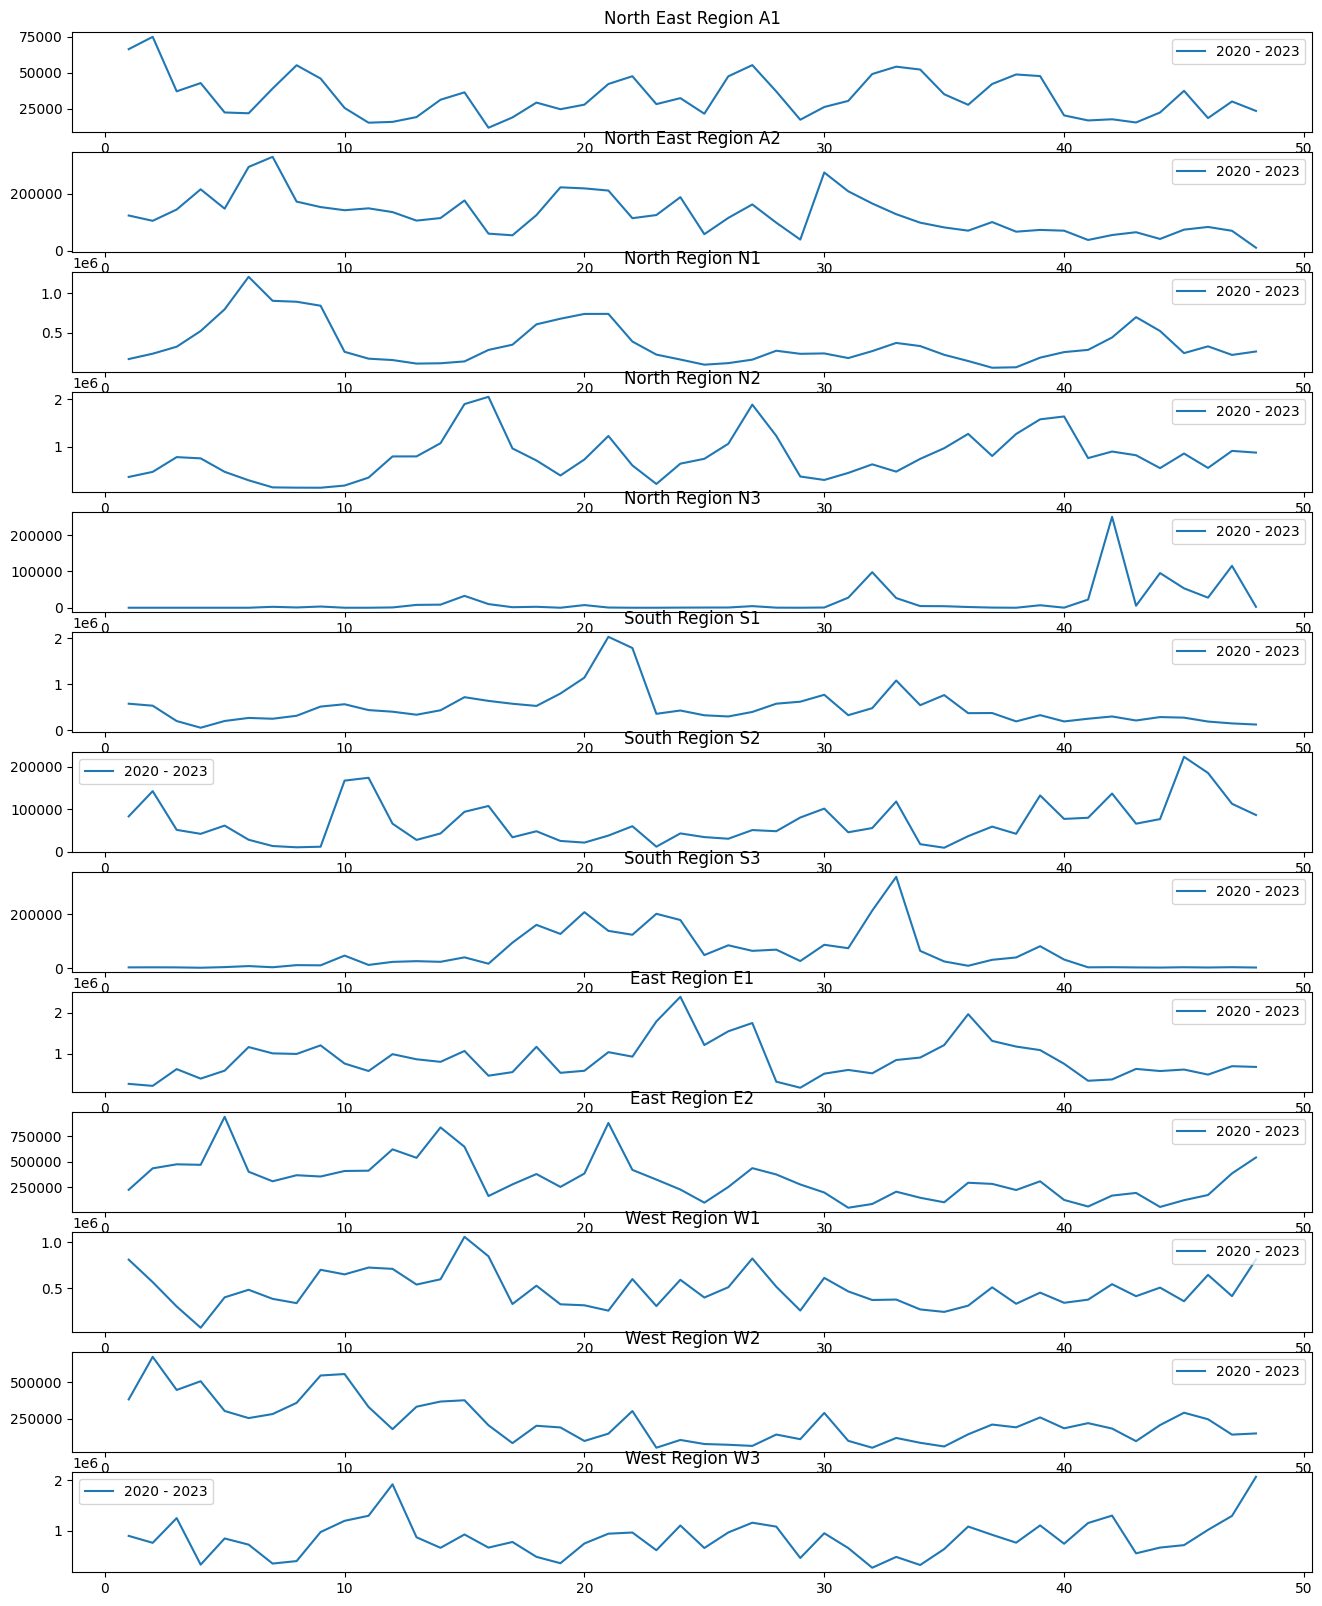

In [21]:
fig, ax = plt.subplots(nrows=len(areas), ncols=1, figsize=(16,20))
for index, (area, region) in enumerate(areas.items()):
    ax[index].plot(new_df.loc[:, "Month"], new_df.loc[:,area], label="2020 - 2023")
    ax[index].set_title(f"{region} {area}")
    ax[index].legend()

plt.show()

In [ ]:

# for month in range(1,new_df.shape[0]+1):
#     print(month)

In [ ]:
dataframe.head()

In [ ]:
dataframe["N1"].describe()

In [ ]:
ts = dataframe["N1"]

In [ ]:
ts.astype('float')
plt.figure(figsize=(16, 8))
plt.title('IEX')
plt.xlabel('Week')
plt.ylabel('MCP')
plt.plot(ts)

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(ts.rolling(window=52, center=False).mean(), label='Rolling Mean')
plt.plot(ts.rolling(
    window=26, center=False).std(), label='Rolling std')
plt.legend()

In [ ]:
res = sm.tsa.seasonal_decompose(ts.values, period=52)
res.plot()

In [ ]:
res = sm.tsa.seasonal_decompose(ts.values, period=52,model="multiplicative")
res.plot()

In [ ]:
# Stationarity tests
def test_stationarity(timeseries):

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = sm.tsa.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=[
                         'Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


test_stationarity(ts)

In [ ]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

In [ ]:
plt.figure(figsize=(16, 16))
plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)
plt.subplot(312)
plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts = difference(ts)
plt.plot(new_ts)
plt.plot()

plt.subplot(313)
plt.title('After De-trend and de-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts = difference(ts, 26)       # assuming the seasonality is 52 weeks long
plt.plot(new_ts)
plt.plot()

In [ ]:
# now testing the seasonality again
test_stationarity(new_ts)

In [ ]:
new_ts.describe()